In [0]:
!pwd

/content


In [0]:
!mkdir assignments

In [0]:
cd assignments

/content/assignments


In [0]:
cd ..

/content


In [0]:
cd drive

/content/drive


In [0]:
cd My\ Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:
from datasets import MNISTDataset

In [0]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

#MNIST Linear Classification Model in Tensorflow 2.0
Using low-level Tensorflow concepts to train simple models

##Imports

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

##Loading data and sanity checking

11493376/11490434 [==============================] - 0s 0us/step


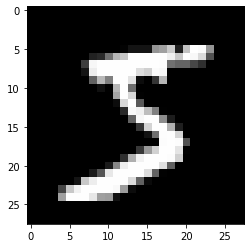

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

##Setting up for training

In [0]:
train_steps = 1000
learning_rate = 0.1

W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))

##Training

In [0]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 2.3025853633880615 Accuracy: 0.0625
Loss: 0.642875075340271 Accuracy: 0.828125
Loss: 0.5322577953338623 Accuracy: 0.8671875
Loss: 0.6014949083328247 Accuracy: 0.8359375
Loss: 0.3685363233089447 Accuracy: 0.9140625
Starting new epoch...
Loss: 0.3949618935585022 Accuracy: 0.921875
Loss: 0.5432207584381104 Accuracy: 0.828125
Loss: 0.3697146475315094 Accuracy: 0.890625
Loss: 0.4188576936721802 Accuracy: 0.8984375
Loss: 0.4068039655685425 Accuracy: 0.890625
Starting new epoch...


##Predicting/testing

In [0]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.9084, shape=(), dtype=float32)


#Deep Model MLP with MNIST

In [0]:
from datasets import MNISTDataset
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

NameError: ignored

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Train and Test data

In [0]:
x_val  = x_train[50000:60000]
x_train = x_train[0:50000]
y_val  = y_train[50000:60000]
y_train = y_train[0:50000]
print(x_train.shape)
print(x_test.shape)

In [0]:
print("train data has " + str(x_train.shape[0]) + " samples")
print("every train data is " + str(x_train.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

In [0]:
print("validation data has " + str(x_val.shape[0]) + " samples")
print("every train data is " + str(x_val.shape[1]) 
      + " * " + str(x_train.shape[2]) + " image")

##setting up

In [0]:
# sample to show gray scale values
print(x_train[0][8])

In [0]:
# sample to show labels for first train data to 10th train data
print(y_train[0:9])

In [0]:
print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

In [0]:
x_train = x_train.reshape(50000, 784)
x_val = x_val.reshape(10000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

In [0]:
x_train[0]

##Normalize data

In [0]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_val /= gray_scale
x_test /= gray_scale

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [0]:
logits = mlp(x)

##Layers

In [0]:
def mlp(x):
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([784,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    # output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h2, w3) + b3
    
    return logits

In [0]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=y))

In [0]:
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

##Training, Validation, Testing

In [0]:
# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 30
batch_size = 1000
iteration = len(x_train) // batch_size

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss / iteration
            
        # Validate model
        preds = tf.nn.softmax(logits)  # Apply softmax to logits
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        print("epoch: "+str(epoch)+", validation accuracy: " 
              + str(cur_val_acc) +', loss: '+str(avg_loss))
    
    # Test model
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))
